## **THE CHURN FACTOR: UNLOCKING CUSTOMER ROYALTY IN TELECOM**

### **BUSINESS UNDERSTANDING**

Understanding telecom customer churn is crucial for businesses in the telecommunications industry, as it directly impacts revenue, customer retention, and overall profitability. Customer churn can be voluntary because of dissatisfaction in the services by the service provider and it can also be involuntary because of service disruption or payment issues. Understanding customer churn rates can have financial implications to the provider. Maintaining current customers is cheaper than that acquiring new ones. Analysing churn rates can give an advantage over competitors. This project aims to predict whether a customer will churn or not depending on the several factors on the datasets.

#### DATA UNDERSTANDING
This SyriaTel data is from https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset, a Telecommunication company.
The dataset contains information about customer churn, which is a significant problem for telecom companies. The goal is
to predict whether a customer will churn or not.
The dataset contains the following columns:'state', 'account length', 'area code', 'phone number','international plan', 'voice mail plan', 'number vmail messages','total day minutes', 'total day calls', 'total day charge','total eve minutes', 'total eve calls', 'total eve charge','total night minutes', 'total night calls', 'total night charge','total intl minutes', 'total intl calls', 'total intl charge','customer service calls', 'churn'

#### LOADING THE DATASET

In [40]:
#importing the necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, f1_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading the dataset
df = pd.read_csv(r"C:\Users\hp\Documents\telecom-project\data\bigml_59c28831336c6604c800002a.csv")
df.head()

In [ ]:
#investigating the data
df.shape

In [ ]:
df.info

In [ ]:
#investigating the statistical features of the data
df.describe()

#### DATA CLEANING

In [ ]:
#checking for duplicates in the dataset
df.duplicated().sum()

The dataset does not have any duplicates.

In [ ]:
#checking for missing values
df.isna().sum()

From the dataset there are no missing values, so we go ahead and analyse the data through eda

#### EXPLORATORY DATA ANALYSIS

#### BAR PLOT: CUSTOMER CHURN RATES

In [ ]:
#calculating churn rates
churn_rate = df['churn'].mean() * 100

#plotting a barplot
sns.countplot(x='churn', data=df, palette=['blue', 'pink'])
plt.title('Churn Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.text(1, 0.5, f"Churn Rate: {churn_rate:.2f}%",
         transform=plt.gca().transAxes,
         horizontalalignment='right',
         verticalalignment='center',
         fontsize=12)

plt.show()

The plot indicates a churn rate of 14.49%. This means that approximately 14.49% of customers have left or are likely to leave the company.The majority of customers (represented by the blue bar) have not churned (False). The smaller pink bar represents the portion of customers who have churned (True).
Customer Retention: The company has a relatively high proportion of customers who have remained loyal.
Churn Prevention: Despite the majority of customers staying, the churn rate of 14.49% suggests that there is room for improvement in customer retention efforts.

#### COUNTPLOTS FOR CATEGORICAL COLUMNS

In [ ]:
#identifying categorical columns
categorical_cols = ['state', 'area code', 'international plan', 'voice mail plan', 'phone number']

#plotting the count plot
fig, axes = plt.subplots(2, 2, figsize=(12, 8)) 

#iterating through the categorical columns
col_idx = 0
for row in range(2):
    for col in range(2):
        if col_idx >= len(categorical_cols):
            break

        col_name = categorical_cols[col_idx]
        sns.countplot(x=col_name, hue='churn', data=df, ax=axes[row, col])
        axes[row, col].set_title(f'{col_name} vs. Churn')
        axes[row, col].set_xlabel(col_name)
        axes[row, col].set_ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        col_idx += 1
plt.tight_layout()

plt.show()

State: The plot shows that the number of churned customers is relatively consistent across different states, with a few states having slightly higher or lower churn rates.
Area Code: While the area code 415 has the highest number of customers, the churn rates across the three area codes (408, 415, and 510) are relatively similar.
International Plan: Customers with an international plan have a significantly higher churn rate compared to those without.
Voice Mail Plan: Customers with a voice mail plan have a slightly lower churn rate compared to those without.
International Plan: The international plan seems to be a strong predictor of churn. The company may want to investigate why customers with international plans are more likely to churn.
Voice Mail Plan: While the effect is less pronounced, having a voice mail plan appears to be slightly correlated with lower churn rates.
State and Area Code: While there are some variations in churn rates across states and area codes, these factors do not seem to be as significant as the international plan and voice mail plan.

#### HISTOGRAM FOR NUMERICAL COLUMNS

In [ ]:
#identifying numerical columns
numerical_cols = ['account length', 'total day minutes', 'total day calls',
                  'total eve minutes', 'total eve calls', 'total night minutes',
                  'total night calls', 'total intl minutes', 'customer service calls']

#plotting the histogram
sns.set(style='whitegrid')
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(10, 30))
fig.suptitle('Distribution of Numerical Features with KDE', fontsize=16)

#iterating through each numerical column
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('') 
    axes[i].set_ylabel('Frequency')

plt.tight_layout(h_pad=1.0, w_pad=1.0) 
plt.show()


Account Length: The distribution of account length appears to be right-skewed, with a longer tail on the right side. This indicates that there are some customers who have been with the company for a significantly longer time than the average.
Total Minutes (Day, Eve, Night): The distributions of total minutes for day, evening, and night calls are all right-skewed, suggesting that there are some customers who make significantly more calls than the average.
Total Calls (Day, Eve, Night): The distributions of total calls for day, evening, and night are also right-skewed, indicating that there are some customers who make a significantly larger number of calls than the average.
Total International Minutes: The distribution of total international minutes is right-skewed, with a longer tail on the right side. This suggests that there are some customers who make significantly more international calls than the average.
Customer Service Calls: The distribution of customer service calls is right-skewed, with a longer tail on the right side. This indicates that there are some customers who require significantly more customer service assistance than the average.

#### PAIRPLOTS BETWEEN FEATURES AND CUSTOMER CHURN

In [ ]:
# Pairplots for relationships between features and churn
sns.pairplot(df, hue='churn', vars=numerical_cols)
plt.show()


Customer Usage Patterns: Many customers have usage patterns that deviate from the average, as evidenced by the skewed distributions.
Variable Relationships: Several variables exhibit strong positive or negative correlations, suggesting interconnected relationships.
Customer Segmentation: The plots hint at potential customer segments based on distinct usage patterns.
Data Anomalies: A few outliers were identified, potentially indicating unusual customer behavior or data errors.

#### BOX PLOT

In [ ]:
# Boxplot for customer service calls vs churn
sns.boxplot(
    x = "churn",
    y = "customer service calls",
    showmeans=True,
    data=df
)

plt.title('Customer Service Calls Distribution by Churn') 
plt.xlabel('Churn (Yes or No)')
plt.ylabel('Customer Service Calls') 
plt.xticks(rotation=45) 

plt.show()

While the median number of customer service calls is slightly higher for churned customers, the overall distributions are quite similar. This suggests that the number of customer service calls alone may not be a strong predictor of churn. However, the presence of outliers in both groups indicates that there might be other factors influencing churn, and further analysis is needed to understand the relationship between customer service calls and churn more comprehensively.

#### COUNTPLOT FOR DISTRIBUTION OF CUSTOMER SERVICE CALLS VS CHURN STATUS

In [ ]:
#plotting the countplot
sns.countplot(
    x = "customer service calls",
    hue = "churn",
    data=df,
    palette="Set2"
)

plt.title('Distribution of Customer Service Calls by Churn Status')  
plt.xlabel('Number of Customer Service Calls')  
plt.ylabel('Number of Customers')  
plt.xticks(rotation=45) 
plt.show()


While the overall distributions are similar, the data suggests that customers who churned are slightly more likely to have made more customer service calls. However, this relationship is not strong, and other factors may also contribute to churn. It's important to consider the context of your data and explore additional variables to gain a deeper understanding of the relationship between customer service calls and churn.

#### COUNTPLOT: INTERNATIONAL PLAN VS CHURN 

In [ ]:
#plotting a count plot
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='international plan', hue='churn', data=df, palette='Set1')
plt.title('International Plan vs Churn', fontsize=16)
plt.xlabel('International Plan', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)
plt.legend(title='Churn', loc='upper right', fontsize=12, title_fontsize='13')
plt.show()


The plot suggests a strong association between having an international plan and customer churn. Customers who subscribed to the international plan are more likely to churn compared to those who did not. This could indicate potential issues or dissatisfaction with the international plan service, which might be worth investigating further.

#### HISTOGRAM OF NEW FEATURES

In [ ]:
#creating a new feature: total minutes
df['total minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']

#creating a new feature: total charges
df['total charges'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']

#plotting the distribution of total minutes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['total minutes'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Minutes')

# Histogram for total charges
plt.subplot(1, 2, 2)
sns.histplot(df['total charges'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Total Charges')

plt.tight_layout()
plt.show()


Both histograms show a similar bell-curve shape, suggesting that most customers have usage patterns that are fairly consistent. However, there's slightly more variation in total charges compared to total minutes.

#### DATA PREPROCESSING

#### DEALING WITH CATEGORICAL COLUMNS

In [ ]:
#creating a copy of the data
df2 = df.copy()

#creating an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

#fitting the encoder on the categorical columns and transform the data
encoded_features = encoder.fit_transform(df2[categorical_cols])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded data with the remaining columns
df2 = pd.concat([df2.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Print the modified DataFrame
df2.head()

In [ ]:
#instanciating the standard scaler
scaler = StandardScaler()

#fitting the standardscaler
scaler.fit(df2[numerical_cols])
df2[numerical_cols] = scaler.transform(df2[numerical_cols])
df2.head()

In [ ]:
df2.info

#### BASELINE LOGISTIC REGRESSION MODEL
The purpose of using a Logistic Regression model in the context of predicting customer churn is to determine the probability that a customer will churn (leave the service) or not, based on the given features.

In [22]:
#defining the features and the target
X = df2.drop('churn', axis=1)
y = df2['churn']

#splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fitting the regression model
model = LogisticRegression()
model.fit(X_train, y_train)

#Making predictions on the testing set
y_pred = model.predict(X_test)


In [ ]:
#Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:\n", recall)
print("Precision:\n", precision)

The model may be struggling to detect positive cases effectively, as indicated by the low recall. This could be a sign of imbalanced data, where the number of negative cases far exceeds the number of positive cases

### CONFUSION MATRIX

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred) 

#confusion Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The confusion matrix shows that the logistic regresion model is able to correctl classify a large number og negative instances but struggles to correctly identigy negative instances. This might be due to class imbalnces or other issues related to the model.

### ROC CURVE
Plotting the ROC curve helps visualize the model's performance across different classification thresholds.

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


The curve is above the diagonal line, indicating that the model perform better than random guessing. However the curve is not perfectly straight indicating that the model is able to discriminate between positive and negative instances to some extent. The AUC value of 0.82 suggests a good overall performance. The curve indicates that the logistic regression model is reasonably a good classifier for customer churn

### PRECISION-RECALL CURVE

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, lw=2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

**HYPERPRAMETER TUNING USING GRIDSEARCHCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)


In [ ]:
#displaying the best parameters
print("Best Hyperparameters:", grid.best_params_)

In [ ]:
# Predicting on the test set
y_pred = grid.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Displaying the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



The evaluation results indicate the following about the model's performance:

Accuracy (0.864): This means that about 86.4% of the predictions made by the model are correct. However, accuracy alone can be misleading, especially if the classes are imbalanced.

Precision (0.639): The precision score indicates that when the model predicts the positive class, it is correct 63.9% of the time. This suggests that there are still some false positives in the model's predictions.

Recall (0.228): The recall score is quite low, at 22.8%. This implies that the model is not capturing a large portion of the actual positive cases, resulting in many false negatives.

F1-score (0.336): The F1-score, which balances precision and recall, is relatively low. This further indicates that the model is struggling to achieve a good balance between precision and recall.

#### DECISION TREE

In [42]:
#training the decision tree model
clf = DecisionTreeClassifier(random_state=42)

#fitting the model
clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test)


In [ ]:
#evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)


The evaluation metrics for the Decision Tree model indicate the following:

Accuracy (0.9805): The model correctly classified 98.05% of the samples in the test set. This indicates a high overall performance.

Precision (1.0000): The model achieved a perfect precision score, meaning all instances predicted as positive were indeed positive. There were no false positives.

Recall (0.8713): The recall score of 87.13% indicates that out of all actual positive cases, the model correctly identified 87.13%. There were some false negatives (13), meaning the model missed a few positive cases.

F1-score (0.9312): This score combines precision and recall into a single metric. A value of 0.9312 suggests a good balance between precision and recall.

**VISULAIZING THE CONFUSION MATRIX**

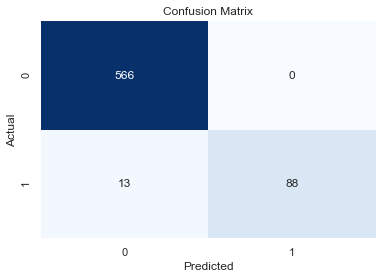

In [44]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Confusion Matrix:

True Negatives (566): The number of negative instances correctly classified.
False Positives (0): No instances were incorrectly classified as positive.
False Negatives (13): Instances that were actually positive but predicted as negative.
True Positives (88): Positive instances correctly classified by the model.

**HYPERPARAMETER TUNING THE MODEL WITH GRIDSEARCHCV**

In [45]:
# Defining the parameter grid for tuning
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Using GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=1)

# Fitting the model to the training data
grid_search.fit(X_train, y_train)

#getting the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Decision Tree Model:", best_model)

# Evaluating the best model on the test set
y_pred = best_model.predict(X_test)

#evaluating the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree Model: DecisionTreeClassifier(max_depth=20, random_state=42)
Accuracy: 0.9805097451274363
Precision: 1.0
Recall: 0.8712871287128713
F1-score: 0.9312169312169313
Confusion Matrix:
 [[566   0]
 [ 13  88]]


The evaluation metrics of the model remain the same after the tuning.

#### RANDOM FOREST CLASSIFIER

In [46]:
# Train random forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Predict on test set
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9235382308845578
Classification Report:
               precision    recall  f1-score   support

       False       0.92      1.00      0.96       566
        True       1.00      0.50      0.66       101

    accuracy                           0.92       667
   macro avg       0.96      0.75      0.81       667
weighted avg       0.93      0.92      0.91       667



**Model Summary**

The model performs well in predicting non-churning customers, with high precision, recall, and F1-score.
However, it struggles to identify churning customers, with a recall of only 0.50. This means that half of the actual churning customers are missed by the model.
To improve the model, techniques such as adjusting class weights, using a different threshold for classification, or employing resampling methods (e.g., SMOTE) could help address the imbalance and improve the recall for the "True" class.


**Improving the Random forest model by adjusting class weights**

In [47]:
# Training random forest with balanced class weights
random_forest_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
random_forest_balanced.fit(X_train, y_train)

# Predicting on test set
y_pred_rf_balanced = random_forest_balanced.predict(X_test)

# Evaluating the model
print("Random Forest with Balanced Class Weights Accuracy:", accuracy_score(y_test, y_pred_rf_balanced))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_balanced))


Random Forest with Balanced Class Weights Accuracy: 0.9145427286356822
Classification Report:
               precision    recall  f1-score   support

       False       0.91      1.00      0.95       566
        True       1.00      0.44      0.61       101

    accuracy                           0.91       667
   macro avg       0.95      0.72      0.78       667
weighted avg       0.92      0.91      0.90       667



The model is very effective at identifying non-churning customers, but its ability to detect churning customers remains limited, even after adjusting the class weights. Further steps, such as more advanced resampling techniques, tuning the decision threshold, or using more sophisticated models, may be needed to improve churn detection.

**Oversampling the Minority Class (SMOTE)**

In [48]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train random forest on SMOTE data
random_forest_smote = RandomForestClassifier(random_state=42)
random_forest_smote.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred_rf_smote = random_forest_smote.predict(X_test)

# Evaluate the model
print("Random Forest with SMOTE Accuracy:", accuracy_score(y_test, y_pred_rf_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_smote))


Random Forest with SMOTE Accuracy: 0.9325337331334332
Classification Report:
               precision    recall  f1-score   support

       False       0.93      1.00      0.96       566
        True       0.97      0.57      0.72       101

    accuracy                           0.93       667
   macro avg       0.95      0.79      0.84       667
weighted avg       0.93      0.93      0.93       667



The use of SMOTE has enhanced the model's ability to detect churning customers, as seen in the improved recall for the "True" class. The model maintains strong performance for non-churning customers while boosting the detection of churn cases. However, further tuning may still be needed to increase the recall for the "True" class to catch more at-risk customers.